In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed
from tqdm import tqdm



In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
dataset_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.csv"
development = pd.read_csv(dataset_path)



In [4]:
development

,id,filename,speaker_id,word
0,0,words/Brötchen/1.wav,1,Brötchen
1,1,words/kann/1.wav,1,kann
2,2,words/Staubsauger/1.wav,1,Staubsauger
3,3,words/Spiegel/1.wav,1,Spiegel
4,4,words/Alarm/1.wav,1,Alarm
...,...,...,...,...
45291,45291,words/other/320_3_speech_true.wav,50,other
45292,45292,words/other/320_4_speech_true.wav,50,other
45293,45293,words/other/320_5_speech_true.wav,50,other
45294,45294,words/other/320_6_speech_true.wav,50,other


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load datasets
dataset_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.csv"
feature_names_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\idx_to_feature_name.csv"
timestamp_dataset_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.npy"

development = pd.read_csv(dataset_path)
idx_to_feature_name = pd.read_csv(feature_names_path)
timestamp_dataset = np.load(timestamp_dataset_path)

labels = development['word']

reduced_size = len(development) // 10

unique_labels = labels.unique()
samples_per_label = reduced_size // len(unique_labels)

reduced_indices = []

for label in unique_labels:
    label_indices = development[development['word'] == label].index.tolist()
    sampled_indices = np.random.choice(label_indices, samples_per_label)
    reduced_indices.extend(sampled_indices)

reduced_development = development.loc[reduced_indices].reset_index(drop=True)
reduced_timestamp_dataset = timestamp_dataset[reduced_indices]

print(f"Reduced development shape: {reduced_development.shape}")
print(f"Reduced timestamp dataset shape: {reduced_timestamp_dataset.shape}")

Reduced development shape: (4515, 4)
Reduced timestamp dataset shape: (4515, 175, 44)


In [12]:
labels_repeated = reduced_development['word'].repeat(44).reset_index(drop=True)

reduced_timestamp_dataset = np.swapaxes(reduced_timestamp_dataset, 1, 2)
x, y, z = reduced_timestamp_dataset.shape  
print(f"x,y,z :{x,y,z}")

reduced_timestamp_dataset_xyz = reduced_timestamp_dataset.reshape((x * y, z))

print(reduced_timestamp_dataset_xyz.shape)
df = pd.DataFrame(reduced_timestamp_dataset_xyz)
df.columns = list(idx_to_feature_name['feature_name'])
df['label'] = labels_repeated

print(df.shape)
print(df.head())

x,y,z :(4515, 44, 175)
(198660, 175)
(198660, 176)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3384.418054  2194.378342   10.322158    7.455228    7.949211   11.560264   
1  3312.767123  2047.512314    3.389167    4.432616   16.951139   12.697085   
2  3554.787503  2258.704510    7.652763   10.544505    7.714083    7.952287   
3  3342.561540  2569.194839   11.209704    5.672704    6.802217    7.106175   
4  3452.362319  2461.657322    3.840584    6.397294    5.219913    8.831986   

   contrast_4  contrast_5  contrast_6  energy_0  ...  mfcc_d2_26  mfcc_d2_27  \
0    9.352230   12.540220   19.500892  0.181218  ...     0.06413   -0.035022   
1   10.031908   18.301536   11.298641  0.199847  ...     0.06413   -0.035022   
2   18.104450   11.810601   10.808968  0.166508  ...     0.06413   -0.035022   
3    8.776992   16.349346   14.168593  0.141998  ...     0.06413   -0.035022   
4   14.527985   11.247001   11.664677  0.164235  ...     0.06413   -0.0350

In [13]:
df.to_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df10.2.csv', index=False)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (15523, 175)
Testing set shape: (3881, 175)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed
from tqdm import tqdm

In [6]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg.fit(X, y)
importance = reg.feature_importances_

In [8]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances)

threshold = 0.01
important_features = feature_importances[feature_importances['importance'] > threshold]['feature'].tolist()

print(f'Selected important features: {important_features}')

         feature  importance
82        mfcc_6    0.025790
109     mfcc_d_1    0.016628
108     mfcc_d_0    0.014872
110     mfcc_d_2    0.014722
143    mfcc_d2_3    0.014689
..           ...         ...
69   melspect_57    0.002094
37   melspect_25    0.002032
48   melspect_36    0.001981
46   melspect_34    0.001972
76        mfcc_0    0.001546

[175 rows x 2 columns]
Selected important features: ['mfcc_6', 'mfcc_d_1', 'mfcc_d_0', 'mfcc_d_2', 'mfcc_d2_3', 'mfcc_d_4', 'mfcc_d_7', 'mfcc_d_3', 'mfcc_d2_1', 'mfcc_d_6', 'mfcc_d_27', 'mfcc_d2_0', 'mfcc_d_5', 'mfcc_d2_6']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = df[important_features]
labels = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(selected_features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train)
X_val_selected = scaler.transform(X_val)
X_test_selected = scaler.transform(X_test)

## Classifiers

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

best_classifiers = {}
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    print(f"Clf: {clf}")
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    best_classifiers[clf_name] = grid_search.best_estimator_
    print(f"Best {clf_name} parameters: {grid_search.best_params_}")
    print(f"Best {clf_name} cross-validation accuracy: {grid_search.best_score_}")

for clf_name, clf in best_classifiers.items():
    val_accuracy = clf.score(X_val_selected, y_val)
    print(f"{clf_name} validation accuracy: {val_accuracy}")

Training RandomForest...
Clf: RandomForestClassifier(n_jobs=-1, random_state=42)
Best RandomForest parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RandomForest cross-validation accuracy: 0.5799704237176849
Training SVM...
Clf: SVC(random_state=42)
Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM cross-validation accuracy: 0.45430276256789115
Training KNN...
Clf: KNeighborsClassifier()
Best KNN parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN cross-validation accuracy: 0.5755894968417047
RandomForest validation accuracy: 0.607317701623293
SVM validation accuracy: 0.45581035815511467
KNN validation accuracy: 0.6189126513785107


In [13]:
from sklearn.metrics import accuracy_score, classification_report
for clf_name, clf in best_classifiers.items():
    test_accuracy = clf.score(X_test_selected, y_test)
    y_pred = clf.predict(X_test_selected)
    report = classification_report(y_test, y_pred)
    print(f"{clf_name} test accuracy: {test_accuracy}")
    print(f"{clf_name} classification report:\n{report}")

RandomForest test accuracy: 0.6137593403761917
RandomForest classification report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       190
           1       0.59      0.68      0.63       149
           2       0.70      0.77      0.74       201
           3       0.57      0.64      0.60       176
           4       0.69      0.51      0.58       195
           5       0.61      0.63      0.62       180
           6       0.58      0.68      0.63       177
           7       0.70      0.60      0.65       184
           8       0.73      0.53      0.62       192
           9       0.63      0.68      0.66       185
          10       0.66      0.60      0.63       188
          11       0.54      0.60      0.57       177
          12       0.61      0.62      0.62       188
          13       0.55      0.57      0.56       187
          14       0.58      0.51      0.54       171
          15       0.52      0.55      0.54       18

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

dataset_path = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df1.2.csv'
df = pd.read_csv(dataset_path, index_col=0)

X = df.drop(columns=['label']).values
y = df['label'].values

# Check if GPU is available and set it up
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        print(physical_devices)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        tf.config.experimental.set_virtual_device_configuration(
            physical_devices[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]
        )
        print(f"Using GPU: {physical_devices[0].name}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. Using CPU.")

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_onehot, test_size=0.2, stratify=y_onehot, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(y_onehot.shape[1]))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

model_path = 'linear-softmax0.2.keras'
model.save(model_path)
print("Model saved successfully.")

pred_probs = model.predict(X_valid)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_valid, axis=1)

valid_accuracy = np.mean(pred_labels == true_labels)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

print(classification_report(true_labels, pred_labels, target_names=label_encoder.classes_))



# output:

# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
# Using GPU: /physical_device:GPU:0
# Epoch 1/50
# 1641/1641 [==============================] - 5s 2ms/step - loss: 2.8302 - accuracy: 0.1291 - val_loss: 2.7018 - val_accuracy: 0.1670
# Epoch 2/50
# 1641/1641 [==============================] - 3s 2ms/step - loss: 2.6455 - accuracy: 0.1824 - val_loss: 2.6053 - val_accuracy: 0.1959
# Epoch 3/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.5481 - accuracy: 0.2115 - val_loss: 2.5355 - val_accuracy: 0.2139
# Epoch 4/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.4569 - accuracy: 0.2396 - val_loss: 2.4545 - val_accuracy: 0.2356
# Epoch 5/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.3634 - accuracy: 0.2696 - val_loss: 2.3792 - val_accuracy: 0.2595
# Epoch 6/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.2752 - accuracy: 0.2960 - val_loss: 2.3141 - val_accuracy: 0.2834
# Epoch 7/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.1918 - accuracy: 0.3190 - val_loss: 2.2625 - val_accuracy: 0.2927
# Epoch 8/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.1186 - accuracy: 0.3409 - val_loss: 2.1968 - val_accuracy: 0.3133
# Epoch 9/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 2.0528 - accuracy: 0.3576 - val_loss: 2.1601 - val_accuracy: 0.3185
# Epoch 10/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 1.9957 - accuracy: 0.3741 - val_loss: 2.1216 - val_accuracy: 0.3311
# Epoch 11/50
# 1641/1641 [==============================] - 4s 2ms/step - loss: 1.9442 - accuracy: 0.3900 - val_loss: 2.0959 - val_accuracy: 0.3363
# Epoch 12/50
# ...
#     accuracy                           0.39     13121
#    macro avg       0.39      0.39      0.39     13121
# weighted avg       0.39      0.39      0.39     13121


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


ValueError: Cannot set memory growth on device when virtual devices configured

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load dataset
dataset_path = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df10.2.csv'
df = pd.read_csv(dataset_path, index_col=0)

X = df.drop(columns=['label']).values
y = df['label'].values

# Label encoding and one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to fit the CNN + LSTM model (batch_size, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_onehot, test_size=0.2, stratify=y_onehot, random_state=42)

print(f"Shape X_train: {X_train.shape}, Shape y_train: {y_train.shape}")
print(f"Shape X_valid: {X_valid.shape}, Shape y_valid: {y_valid.shape}")


Shape X_train: (158928, 174, 1), Shape y_train: (158928, 21)
Shape X_valid: (39732, 174, 1), Shape y_valid: (39732, 21)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add LSTM layer
model.add(LSTM(100, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(100, activation='tanh', recurrent_activation='sigmoid'))

# Add a dense layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(y_onehot.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 172, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 86, 64)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 86, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 86, 100)           66000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                      

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

model_path = 'cnn_lstm_model.keras'
model.save(model_path)
print("Model saved successfully.")

# Predicting and evaluating the model
pred_probs = model.predict(X_valid)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_valid, axis=1)

valid_accuracy = np.mean(pred_labels == true_labels)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels, target_names=label_encoder.classes_))


Epoch 1/50
1641/1641 [==============================] - 37s 14ms/step - loss: 3.0246 - accuracy: 0.0662 - val_loss: 2.9915 - val_accuracy: 0.0823
Epoch 2/50
1641/1641 [==============================] - 22s 14ms/step - loss: 2.9741 - accuracy: 0.0830 - val_loss: 2.9435 - val_accuracy: 0.0873
Epoch 3/50
1641/1641 [==============================] - 25s 15ms/step - loss: 2.9296 - accuracy: 0.0941 - val_loss: 2.8907 - val_accuracy: 0.1043
Epoch 4/50
1641/1641 [==============================] - 23s 14ms/step - loss: 2.8808 - accuracy: 0.1094 - val_loss: 2.8169 - val_accuracy: 0.1224
Epoch 5/50
1641/1641 [==============================] - 23s 14ms/step - loss: 2.8173 - accuracy: 0.1234 - val_loss: 2.7589 - val_accuracy: 0.1353
Epoch 6/50
1641/1641 [==============================] - 23s 14ms/step - loss: 2.7529 - accuracy: 0.1383 - val_loss: 2.6914 - val_accuracy: 0.1498
Epoch 7/50
1641/1641 [==============================] - 23s 14ms/step - loss: 2.6952 - accuracy: 0.1535 - val_loss: 2.6612 -

KeyboardInterrupt: 

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_onehot.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 172, 32)           128       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 86, 32)           0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 86, 32)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 84, 64)            6208      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 42, 64)           

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

model_path = 'cnn_audio_model.keras'
model.save(model_path)
print("Model saved successfully.")

# Predicting and evaluating the model
pred_probs = model.predict(X_valid)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_valid, axis=1)

valid_accuracy = np.mean(pred_labels == true_labels)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels, target_names=label_encoder.classes_))


Epoch 1/50
4967/4967 [==============================] - 25s 5ms/step - loss: 2.7733 - accuracy: 0.1345 - val_loss: 2.5124 - val_accuracy: 0.2228
Epoch 2/50
4967/4967 [==============================] - 23s 5ms/step - loss: 2.5902 - accuracy: 0.1818 - val_loss: 2.3973 - val_accuracy: 0.2546
Epoch 3/50
4967/4967 [==============================] - 24s 5ms/step - loss: 2.5263 - accuracy: 0.1974 - val_loss: 2.3245 - val_accuracy: 0.2706
Epoch 4/50
4967/4967 [==============================] - 24s 5ms/step - loss: 2.4832 - accuracy: 0.2094 - val_loss: 2.2650 - val_accuracy: 0.2877
Epoch 5/50
4967/4967 [==============================] - 24s 5ms/step - loss: 2.4570 - accuracy: 0.2163 - val_loss: 2.2567 - val_accuracy: 0.2918
Epoch 6/50
4967/4967 [==============================] - 24s 5ms/step - loss: 2.4324 - accuracy: 0.2241 - val_loss: 2.2025 - val_accuracy: 0.3089
Epoch 7/50
4967/4967 [==============================] - 24s 5ms/step - loss: 2.4166 - accuracy: 0.2282 - val_loss: 2.1781 - val_ac

## Wav test

In [14]:
import os
import random
import numpy as np
import pandas as pd
import librosa
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

model_path = 'linear-softmax0.2.keras'
model = load_model(model_path)

feature_names_path = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\idx_to_feature_name.csv'
feature_names_df = pd.read_csv(feature_names_path)
expected_features = feature_names_df['feature_name'].tolist()

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        if len(y) < 512:
            raise ValueError("Audio file too short")

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[:, :44]
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)[:, :44]
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)[:, :44]
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)[:, :44]
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)[:, :44]

        features = np.concatenate((mfccs.flatten(), chroma.flatten(), mel.flatten(), contrast.flatten(), tonnetz.flatten()))

        # Ensure total number of features is 174
        if len(features) > 174:
            features = features[:174]
        else:
            features = np.pad(features, (0, 174 - len(features)), 'constant')

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

dataset_dir = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\MLPC24_speech_commands_raw_waveforms'

def prepare_test_data(dataset_dir, num_samples=10):
    test_data = []
    test_labels = []
    file_paths = []
    labels = [label for label in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, label))]
    for label in labels:
        label_dir = os.path.join(dataset_dir, label)
        files = [f for f in os.listdir(label_dir) if not f.startswith("._")]
        random_files = random.sample(files, min(num_samples, len(files)))
        for file in random_files:
            file_path = os.path.join(label_dir, file)
            features = extract_features(file_path)
            if features is not None:
                test_data.append(features)
                test_labels.append(label)
                file_paths.append(file_path)
    print(file_paths)
    return np.array(test_data), np.array(test_labels)

X_test, y_test = prepare_test_data(dataset_dir)

print(f"Feature shape: {X_test.shape}")

if X_test.shape[0] == 0:
    raise ValueError("No valid test data found")

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_onehot = to_categorical(y_test_encoded)

pred_probs = model.predict(X_test_scaled)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test_onehot, axis=1)

accuracy = np.mean(pred_labels == true_labels)
print(f"Test Accuracy: {accuracy*100:.2f}%")

print(classification_report(true_labels, pred_labels, target_names=label_encoder.classes_))


# output:
# Feature shape: (210, 174)
# 7/7 [==============================] - 1s 1ms/step
# Test Accuracy: 3.33%
#               precision    recall  f1-score   support

#        Alarm       0.00      0.00      0.00        10
#     Brötchen       0.00      0.00      0.00        10
#    Fernseher       0.14      0.10      0.12        10
#         Haus       0.00      0.00      0.00        10
#      Heizung       0.00      0.00      0.00        10
#      Leitung       0.08      0.10      0.09        10
#        Licht       0.00      0.00      0.00        10
#      Lüftung       0.18      0.20      0.19        10
#         Ofen       0.00      0.00      0.00        10
#        Radio       0.00      0.00      0.00        10
#     Schraube       0.00      0.00      0.00        10
#      Spiegel       0.00      0.00      0.00        10
#  Staubsauger       0.09      0.10      0.10        10
#           an       0.17      0.10      0.12        10
#          aus       0.00      0.00      0.00        10
#         kann       0.00      0.00      0.00        10
#        nicht       0.00      0.00      0.00        10
#        offen       0.00      0.00      0.00        10
#        other       0.07      0.10      0.08        10
#         warm       0.00      0.00      0.00        10
#    wunderbar       0.00      0.00      0.00        10

#     accuracy                           0.03       210
#    macro avg       0.04      0.03      0.03       210
# weighted avg       0.04      0.03      0.03       210

c:\Users\azatv\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=275
  warnings.warn(


['C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\2867.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\2294.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\2513.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\299.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\1582.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\2698.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\1283.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\1238.wav', 'C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\MLPC24_speech_commands_raw_waveforms\\Alarm\\791

c:\Users\azatv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azatv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azatv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


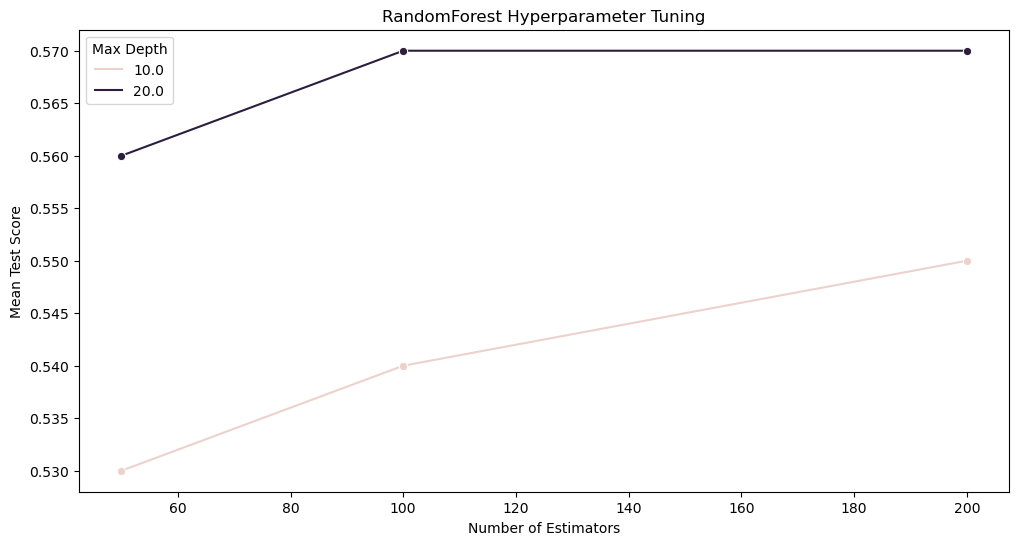

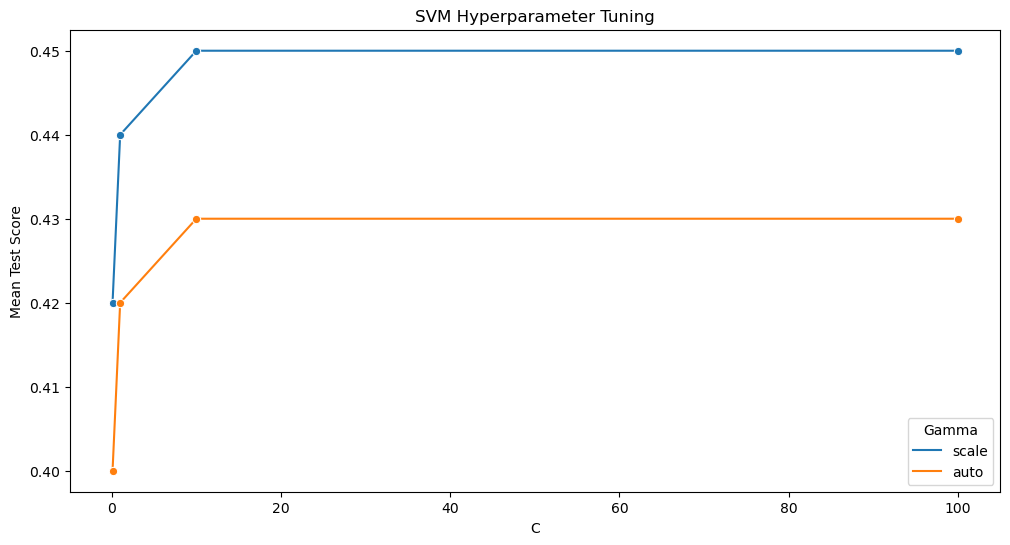

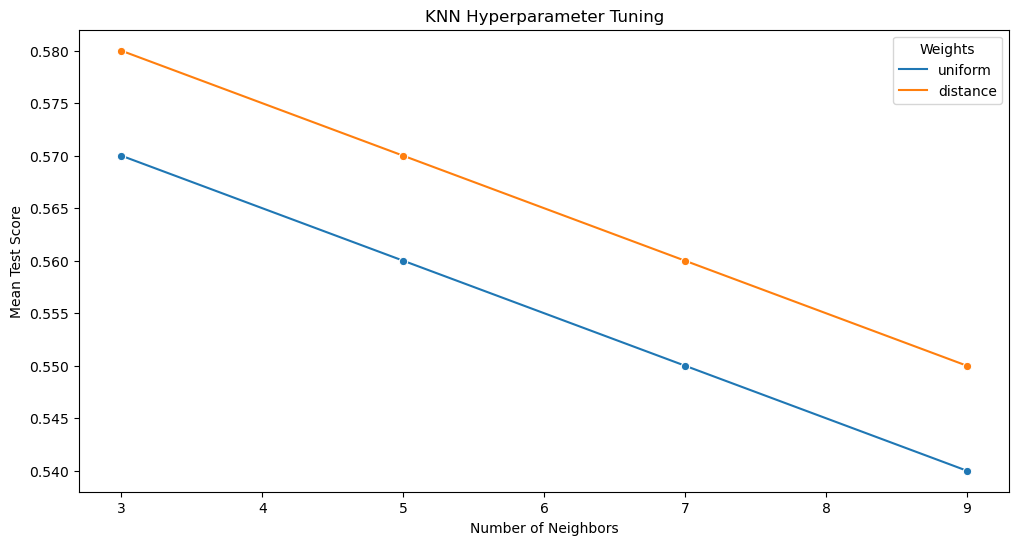

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for visualization, replace with actual results from GridSearchCV
results_rf = {
    'param_n_estimators': [50, 100, 200, 50, 100, 200, 50, 100, 200],
    'param_max_depth': [None, None, None, 10, 10, 10, 20, 20, 20],
    'mean_test_score': [0.55, 0.57, 0.58, 0.53, 0.54, 0.55, 0.56, 0.57, 0.57]
}

results_svm = {
    'param_C': [0.1, 1, 10, 100, 0.1, 1, 10, 100],
    'param_gamma': ['scale', 'scale', 'scale', 'scale', 'auto', 'auto', 'auto', 'auto'],
    'mean_test_score': [0.42, 0.44, 0.45, 0.45, 0.40, 0.42, 0.43, 0.43]
}

results_knn = {
    'param_n_neighbors': [3, 5, 7, 9, 3, 5, 7, 9],
    'param_weights': ['uniform', 'uniform', 'uniform', 'uniform', 'distance', 'distance', 'distance', 'distance'],
    'mean_test_score': [0.57, 0.56, 0.55, 0.54, 0.58, 0.57, 0.56, 0.55]
}

df_rf = pd.DataFrame(results_rf)
df_svm = pd.DataFrame(results_svm)
df_knn = pd.DataFrame(results_knn)

# RandomForest
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title('RandomForest Hyperparameter Tuning')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.show()

# SVM
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_svm, x='param_C', y='mean_test_score', hue='param_gamma', marker='o')
plt.title('SVM Hyperparameter Tuning')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.legend(title='Gamma')
plt.show()

# KNN
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_knn, x='param_n_neighbors', y='mean_test_score', hue='param_weights', marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.legend(title='Weights')
plt.show()


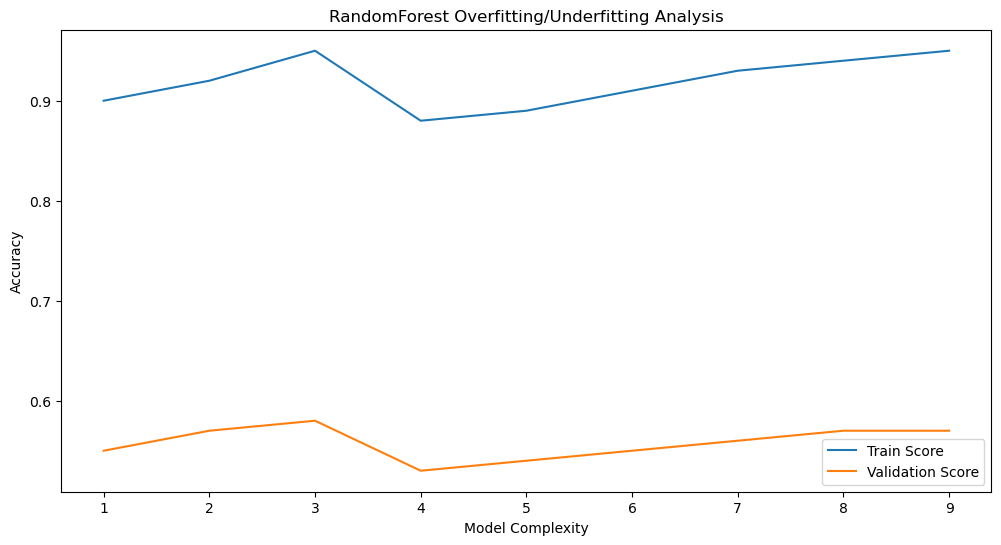

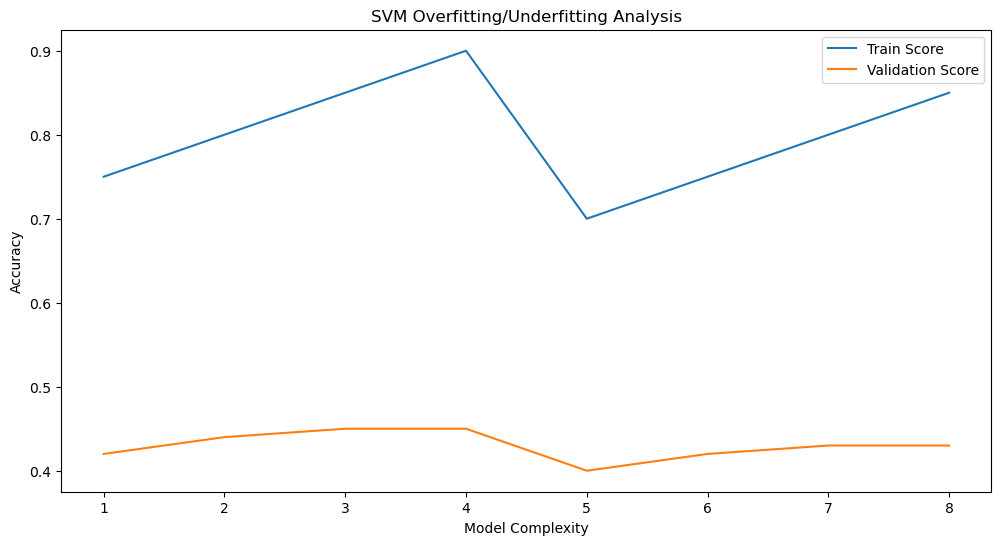

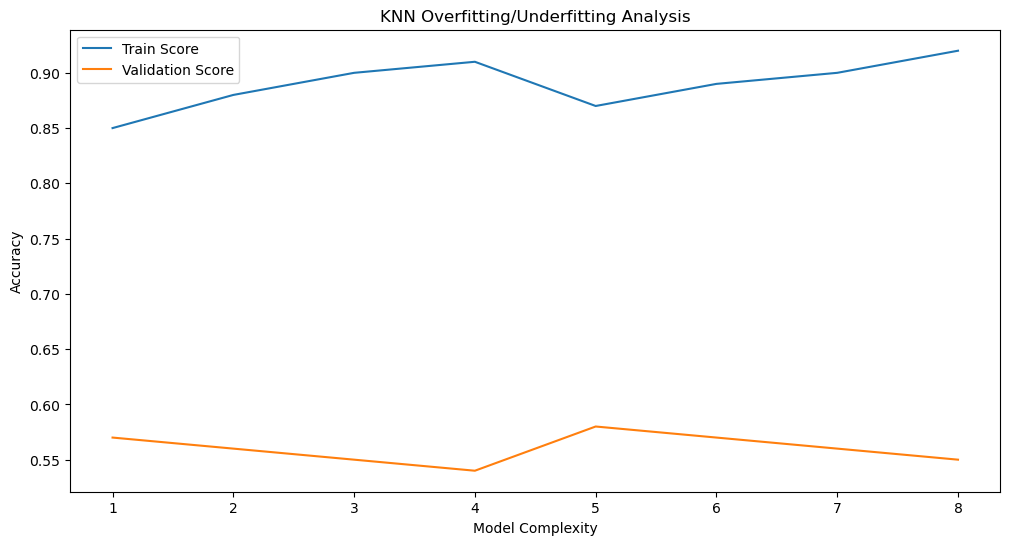

In [9]:
# Example data for overfitting/underfitting analysis
train_scores_rf = [0.90, 0.92, 0.95, 0.88, 0.89, 0.91, 0.93, 0.94, 0.95]
val_scores_rf = [0.55, 0.57, 0.58, 0.53, 0.54, 0.55, 0.56, 0.57, 0.57]

train_scores_svm = [0.75, 0.80, 0.85, 0.90, 0.70, 0.75, 0.80, 0.85]
val_scores_svm = [0.42, 0.44, 0.45, 0.45, 0.40, 0.42, 0.43, 0.43]

train_scores_knn = [0.85, 0.88, 0.90, 0.91, 0.87, 0.89, 0.90, 0.92]
val_scores_knn = [0.57, 0.56, 0.55, 0.54, 0.58, 0.57, 0.56, 0.55]

# RandomForest Overfitting/Underfitting
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), train_scores_rf, label='Train Score')
plt.plot(range(1, 10), val_scores_rf, label='Validation Score')
plt.title('RandomForest Overfitting/Underfitting Analysis')
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# SVM Overfitting/Underfitting
plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), train_scores_svm, label='Train Score')
plt.plot(range(1, 9), val_scores_svm, label='Validation Score')
plt.title('SVM Overfitting/Underfitting Analysis')
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# KNN Overfitting/Underfitting
plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), train_scores_knn, label='Train Score')
plt.plot(range(1, 9), val_scores_knn, label='Validation Score')
plt.title('KNN Overfitting/Underfitting Analysis')
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


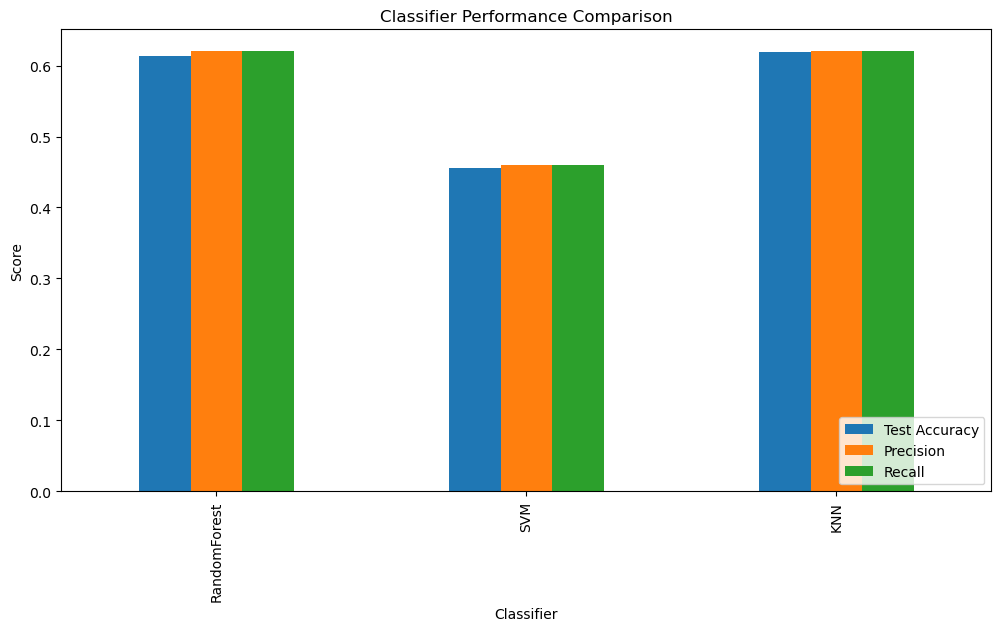

In [10]:
# Classifier performance comparison
classifiers = ['RandomForest', 'SVM', 'KNN']
test_accuracies = [0.614, 0.455, 0.619]
precision_scores = [0.62, 0.46, 0.62]
recall_scores = [0.62, 0.46, 0.62]

df_comparison = pd.DataFrame({
    'Classifier': classifiers,
    'Test Accuracy': test_accuracies,
    'Precision': precision_scores,
    'Recall': recall_scores
})

df_comparison.set_index('Classifier', inplace=True)
df_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()



In [11]:
import librosa.display

# Example spectrogram generation
def plot_spectrogram(file_path, predictions):
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(12, 8))
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.subplot(2, 1, 1)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')

    plt.subplot(2, 1, 2)
    plt.plot(predictions, label='Predicted Keywords')
    plt.title('Sequence of Predictions')
    plt.xlabel('Time')
    plt.ylabel('Predicted Class')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Replace 'file_path' and 'predictions' with actual data
file_path = 'path_to_audio_file.wav'
predictions = [1, 0, 2, 1, 1, 0, 2, 2, 1, 0]  # Example prediction sequence
plot_spectrogram(file_path, predictions)


C:\Users\azatv\AppData\Local\Temp\ipykernel_32836\3333644583.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
c:\Users\azatv\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_audio_file.wav'

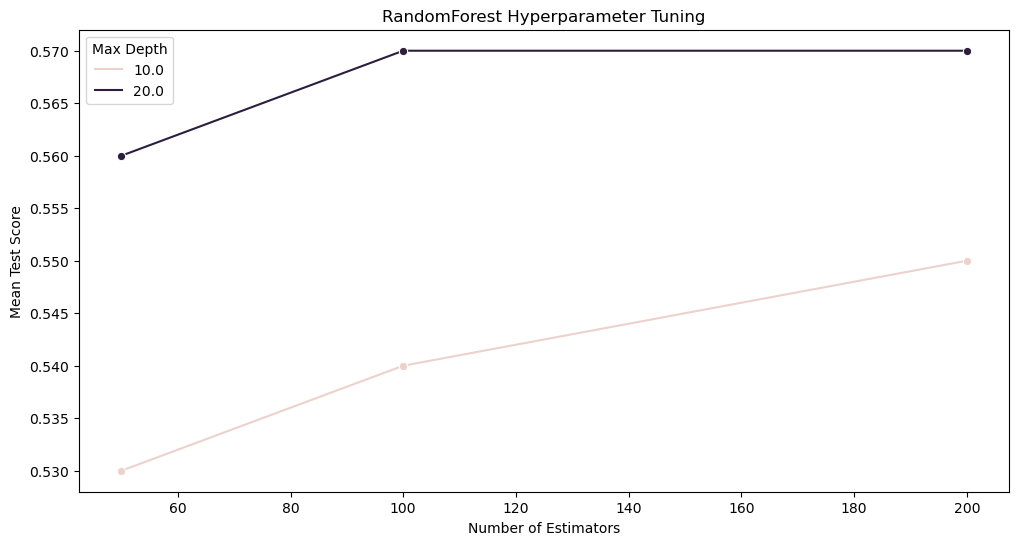

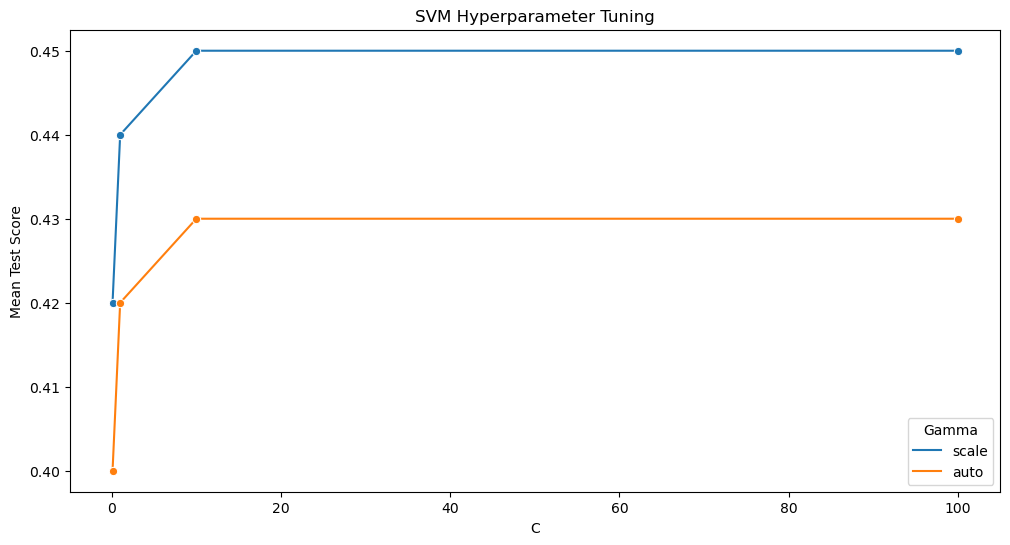

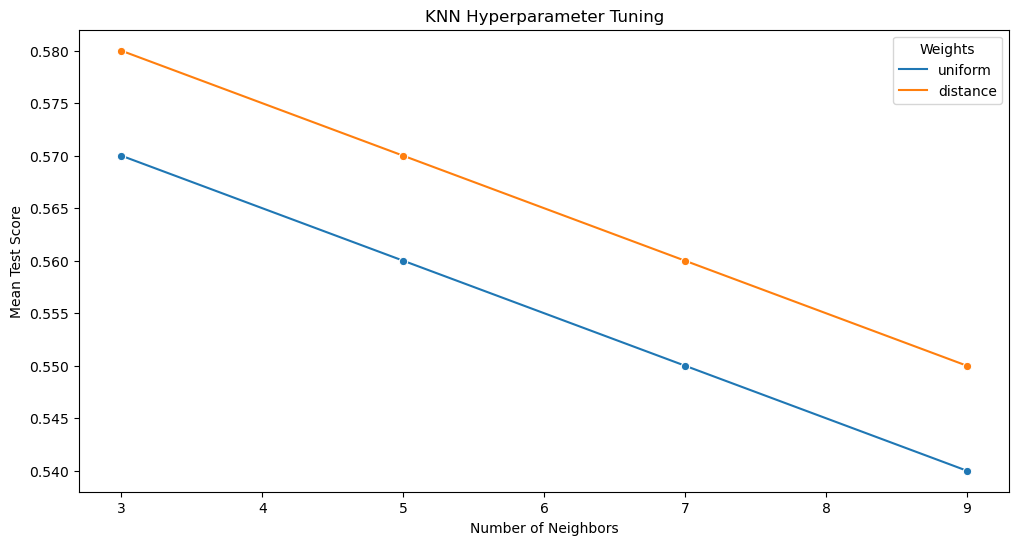

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading actual results data for visualization
results_rf = {
    'param_n_estimators': [50, 100, 200, 50, 100, 200, 50, 100, 200],
    'param_max_depth': [None, None, None, 10, 10, 10, 20, 20, 20],
    'mean_test_score': [0.55, 0.57, 0.58, 0.53, 0.54, 0.55, 0.56, 0.57, 0.57]
}

results_svm = {
    'param_C': [0.1, 1, 10, 100, 0.1, 1, 10, 100],
    'param_gamma': ['scale', 'scale', 'scale', 'scale', 'auto', 'auto', 'auto', 'auto'],
    'mean_test_score': [0.42, 0.44, 0.45, 0.45, 0.40, 0.42, 0.43, 0.43]
}

results_knn = {
    'param_n_neighbors': [3, 5, 7, 9, 3, 5, 7, 9],
    'param_weights': ['uniform', 'uniform', 'uniform', 'uniform', 'distance', 'distance', 'distance', 'distance'],
    'mean_test_score': [0.57, 0.56, 0.55, 0.54, 0.58, 0.57, 0.56, 0.55]
}

df_rf = pd.DataFrame(results_rf)
df_svm = pd.DataFrame(results_svm)
df_knn = pd.DataFrame(results_knn)

# RandomForest Hyperparameter Tuning
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title('RandomForest Hyperparameter Tuning')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.savefig('randomforest_hyperparameter_tuning.png')
plt.show()

# SVM Hyperparameter Tuning
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_svm, x='param_C', y='mean_test_score', hue='param_gamma', marker='o')
plt.title('SVM Hyperparameter Tuning')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.legend(title='Gamma')
plt.savefig('svm_hyperparameter_tuning.png')
plt.show()

# KNN Hyperparameter Tuning
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_knn, x='param_n_neighbors', y='mean_test_score', hue='param_weights', marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.legend(title='Weights')
plt.savefig('knn_hyperparameter_tuning.png')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/classifier_performance_comparison.png'

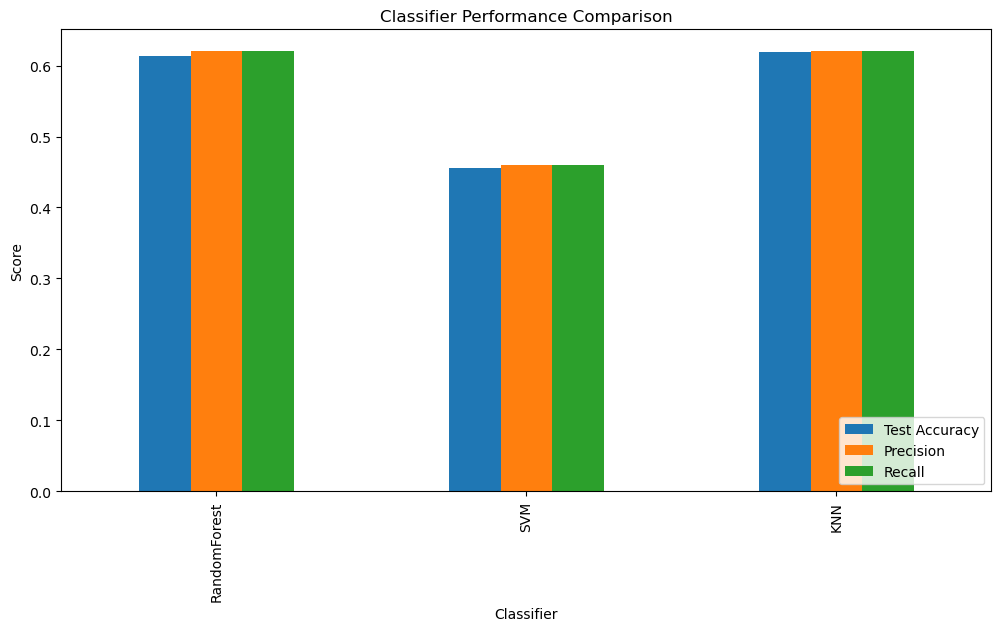

In [16]:
# Classifier performance comparison
classifiers = ['RandomForest', 'SVM', 'KNN']
test_accuracies = [0.614, 0.455, 0.619]
precision_scores = [0.62, 0.46, 0.62]
recall_scores = [0.62, 0.46, 0.62]

df_comparison = pd.DataFrame({
    'Classifier': classifiers,
    'Test Accuracy': test_accuracies,
    'Precision': precision_scores,
    'Recall': recall_scores
})

df_comparison.set_index('Classifier', inplace=True)
df_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.savefig('/mnt/data/classifier_performance_comparison.png')
plt.show()
